# Make some plots using a TrkAna file!

In [1]:
from mu2etools import read_data as rd

In [2]:
# Read a file
file = rd.read_file('nts.sgrant.CosmicCRYExtractedCatDigiTrk.MDC2020z2_best_v1_1.001205_00000000.root')

---> Reading file:
nts.sgrant.CosmicCRYExtractedCatDigiTrk.MDC2020z2_best_v1_1.001205_00000000.root

---> Created xroot url:
root://fndcadoor.fnal.gov:1094/mu2e/tape/usr-nts/nts/sgrant/CosmicCRYExtractedCatDigiTrk/MDC2020z2_best_v1_1/root/40/73/nts.sgrant.CosmicCRYExtractedCatDigiTrk.MDC2020z2_best_v1_1.001205_00000000.root

---> Opening file with uproot...
Done!


In [3]:
# Get the tree
tree = file["TrkAnaExt/trkana"]
# tree.keys() # inspect the branches if you like

In [4]:
# Load CRV XZ coincidence position branches as an awkward array
import awkward as ak
arrays = tree.arrays(["crvcoincs.PEs", "crvcoincs.pos.fCoordinates.fX", "crvcoincs.pos.fCoordinates.fY"])

In [5]:
# Flatten the branches before plotting as histograms
crv_PEs = ak.flatten(arrays["crvcoincs.PEs"], axis=None)
crv_x = ak.flatten(arrays["crvcoincs.pos.fCoordinates.fX"], axis=None)
crv_y = ak.flatten(arrays["crvcoincs.pos.fCoordinates.fY"], axis=None)

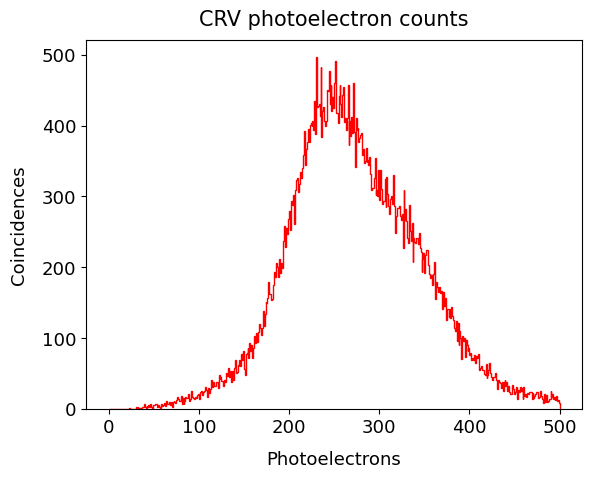

In [6]:
# Make a 1D plot of CRV photoelectron counts

# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Create figure and axes
fig, ax = plt.subplots()

# Plot the histogram with outline
counts, bin_edges, _ = ax.hist(crv_PEs, bins=500, range=(0, 500), histtype='step', edgecolor='red', linewidth=1.0, fill=False, density=False)

ax.set_title("CRV photoelectron counts", fontsize=15, pad=10)
ax.set_xlabel("Photoelectrons", fontsize=13, labelpad=10) 
ax.set_ylabel("Coincidences", fontsize=13, labelpad=10) 

# Set font size of tick labels on x and y axes
ax.tick_params(axis='x', labelsize=13)  # Set x-axis tick label font size
ax.tick_params(axis='y', labelsize=13)  # Set y-axis tick label font size


plt.savefig("h1_crvPEs.png", dpi=300, bbox_inches="tight")
plt.show()

# Clear memory
plt.close()

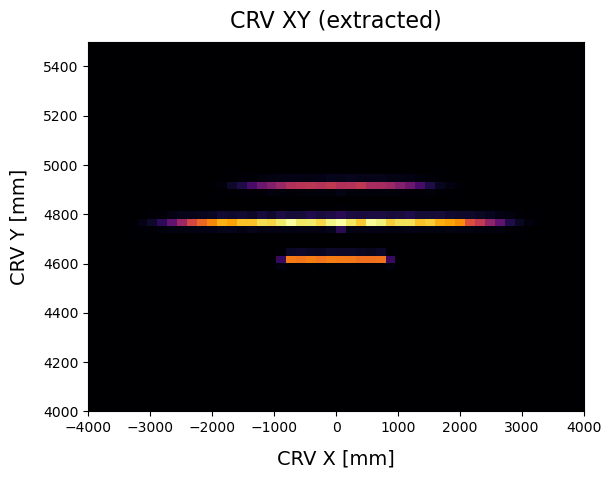

In [7]:
# Make a 2D plot 

# Import libraries
import matplotlib.colors as colors

# Create figure and axes
fig, ax = plt.subplots()

# Sorry for the complication...
# Filter out empty entries from x and y
valid_indices = [i for i in range(len(crv_x)) if np.any(crv_y[i]) and np.any(crv_y[i])]
# Extract valid data points based on the indices
crv_x = [crv_x[i] for i in valid_indices]
crv_y = [crv_y[i] for i in valid_indices]

# Create 2D histogram
hist, x_edges, y_edges = np.histogram2d(crv_x, crv_y, bins=[50, 50], range=[[-4000, 4000], [4000, 5500]])
# Define the normalisation
norm = colors.Normalize(vmin=0, vmax=np.max(hist))
# # Plot the 2D histogram
im = ax.imshow(hist.T, cmap='inferno', extent=[-4000, 4000, 4000, 5500], aspect='auto', origin='lower', norm=norm)
# Limit the y-axis
ax.set_ylim(4000, 5500)
plt.title("CRV XY (extracted)", fontsize=16, pad=10)
plt.xlabel("CRV X [mm]", fontsize=14, labelpad=10)
plt.ylabel("CRV Y [mm]", fontsize=14, labelpad=10)
# Save and display
plt.savefig("h2_crvXY.png", dpi=300, bbox_inches="tight")
plt.show()
# Clean up memory    
plt.close()